In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('btcn.csv')

In [33]:
dataset

,1528968660,6489.549805
0,1528968720,6487.379883
1,1528968780,6479.410156
2,1528968840,6479.410156
3,1528968900,6479.979980
4,1528968960,6480.000000
...,...,...
97718,1535214960,6713.140137
97719,1535215020,6714.520020
97720,1535215080,6714.520020
97721,1535215140,6715.000000


In [2]:
training_set = dataset.iloc[:40000, 1:2].values
X_train=[]
y_train=[]
for i in range(20,40000):
    X_train.append(training_set[i-20:i,0])
    y_train.append(training_set[i,0])
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)

In [3]:
training_set

array([[6487.379883],
       [6479.410156],
       [6479.410156],
       ...,
       [6331.669922],
       [6332.009766],
       [6334.990234]])

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [30]:
from sklearn.neural_network import MLPRegressor

In [5]:
model = Sequential()
model.add(Convolution1D(filters=16, kernel_size=3, activation='relu', input_shape=(20,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [6]:
X_train.shape

(39980, 20, 1)

In [7]:
X_train

array([[[6487.379883],
        [6479.410156],
        [6479.410156],
        ...,
        [6485.      ],
        [6485.      ],
        [6489.990234]],

       [[6479.410156],
        [6479.410156],
        [6479.97998 ],
        ...,
        [6485.      ],
        [6489.990234],
        [6486.359863]],

       [[6479.410156],
        [6479.97998 ],
        [6480.      ],
        ...,
        [6489.990234],
        [6486.359863],
        [6487.259766]],

       ...,

       [[6319.990234],
        [6324.779785],
        [6324.77002 ],
        ...,
        [6329.879883],
        [6329.879883],
        [6329.879883]],

       [[6324.779785],
        [6324.77002 ],
        [6325.819824],
        ...,
        [6329.879883],
        [6329.879883],
        [6331.669922]],

       [[6324.77002 ],
        [6325.819824],
        [6325.819824],
        ...,
        [6329.879883],
        [6331.669922],
        [6332.009766]]])

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', learning_rate='constant', random_state=0, max_iter=1000)

In [8]:
# fit network
history=model.fit(X_train,y_train,epochs=40,batch_size=8,validation_split=0.02)

Train on 39180 samples, validate on 800 samples
Epoch 1/40
39180/39180 [==============================] - 48s 1ms/step - loss: 248367.1611 - val_loss: 59.5413
Epoch 2/40
39180/39180 [==============================] - 55s 1ms/step - loss: 370.4276 - val_loss: 1517.4547
Epoch 3/40
39180/39180 [==============================] - 77s 2ms/step - loss: 437.5374 - val_loss: 262.5749
Epoch 4/40
39180/39180 [==============================] - 75s 2ms/step - loss: 441.7226 - val_loss: 212.3893
Epoch 5/40
39180/39180 [==============================] - 84s 2ms/step - loss: 399.6529 - val_loss: 1269.4433
Epoch 6/40
39180/39180 [==============================] - 73s 2ms/step - loss: 401.6239 - val_loss: 615.2192
Epoch 7/40
39180/39180 [==============================] - 75s 2ms/step - loss: 375.6729 - val_loss: 147.3041
Epoch 8/40
39180/39180 [==============================] - 82s 2ms/step - loss: 368.1411 - val_loss: 258.4186
Epoch 9/40
39180/39180 [==============================] - 75s 2ms/step - los

In [11]:
test_set=dataset.iloc[75000, 1:2].values
X_test=[]
y_test=[]

In [13]:
#Prediction on test set
#To pridict other values the range of test set can be changed according to need
dataset_test=dataset.iloc[75000:, 1:2].values
y_test=dataset.iloc[75000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [14]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [17]:
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(20,22690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = model.predict(X_test)

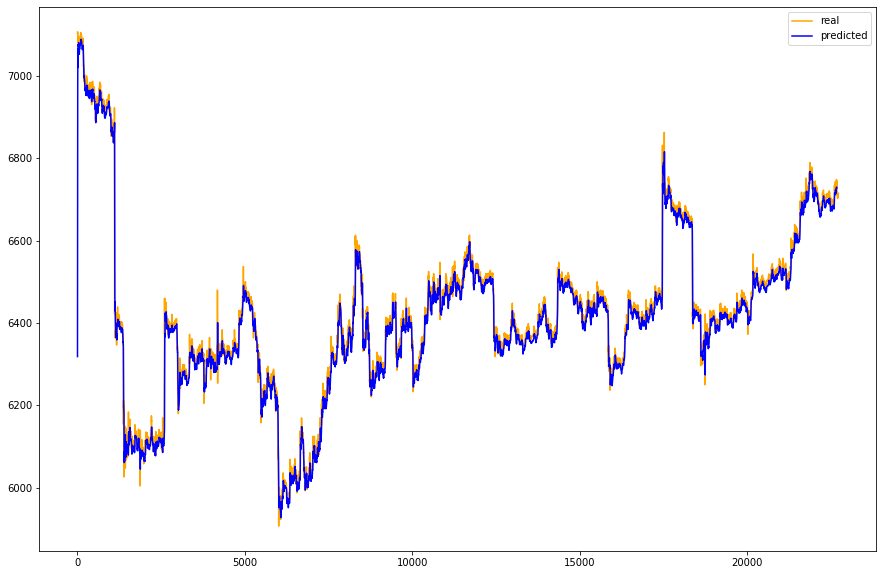

In [21]:
plt.figure(figsize = (15,10))
plt.plot(y_test, color = 'orange', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()
plt.show()

In [23]:
#Prediction
dataset_test=dataset.iloc[95000:, 1:2].values
y_test=dataset.iloc[95000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [24]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [27]:
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(20,2690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = model.predict(X_test)

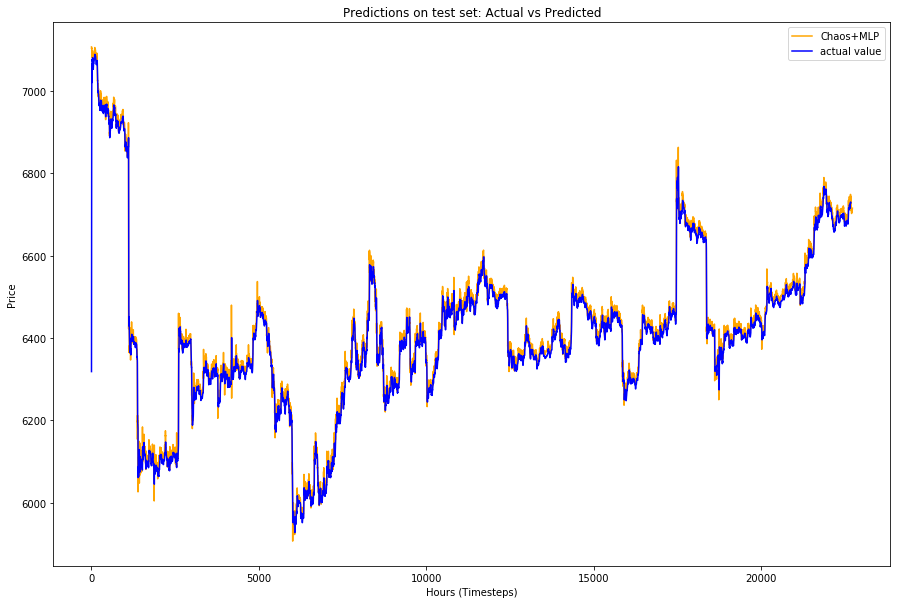

In [14]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'orange', label="real" )
plt.plot(predicted, color = 'blue', label="actual")
plt.legend()

In [31]:
from sklearn.externals import joblib

/home/yaduveer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [32]:
joblib.dump(model,'chaosmlp_joblib')

['chaosmlp_joblib']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('btcn.csv')


In [2]:
test_set=dataset.iloc[75000, 1:2].values
X_test=[]
y_test=[]

In [7]:
#Prediction
dataset_test=dataset.iloc[95000:, 1:2].values
y_test=dataset.iloc[95000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [5]:
training_set = dataset.iloc[:40000, 1:2].values
X_train=[]
y_train=[]
for i in range(20,40000):
    X_train.append(training_set[i-20:i,0])
    y_train.append(training_set[i,0])
X_train=np.asarray(X_train)
y_train=np.asarray(y_train)

In [8]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [9]:
from sklearn.externals import joblib
jb = joblib.load('chaosmlp_joblib')

/home/yaduveer/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [10]:
#Prediction on test set
#To pridict other values the range of test set can be changed according to need
dataset_test=dataset.iloc[75000:, 1:2].values
y_test=dataset.iloc[75000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [11]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [12]:
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(20,22690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = jb.predict(X_test)

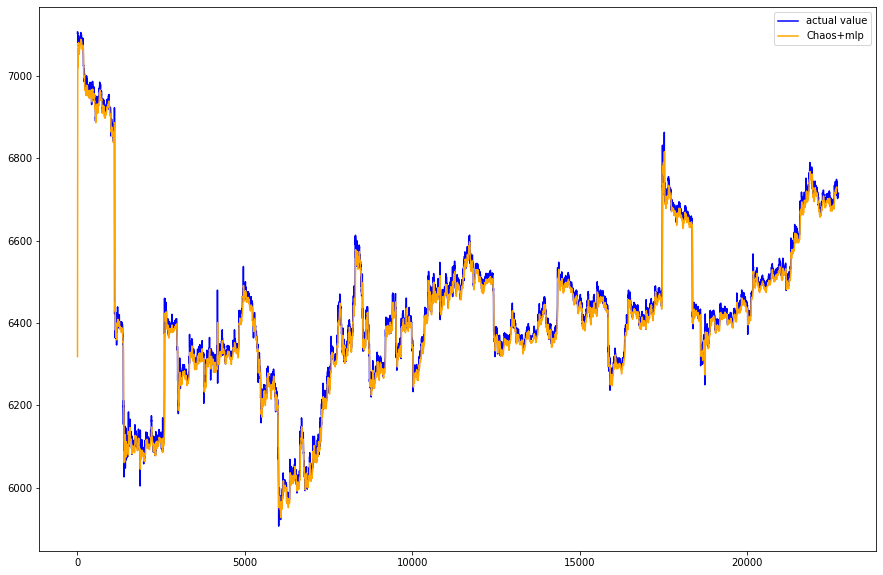

In [15]:
plt.figure(figsize = (15,10))
plt.plot(y_test, color = 'blue', label="actual value" )
plt.plot(predicted, color = 'orange', label="Chaos+mlp")
plt.legend()
plt.show()

In [16]:
#Prediction
dataset_test=dataset.iloc[95000:, 1:2].values
y_test=dataset.iloc[95000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [17]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [18]:
inputs = inputs.reshape(-1,1)
X_test = []
for i in range(20,22690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = jb.predict(X_test)

IndexError: tuple index out of range